In [4]:
import os
import hashlib
from PIL import Image

def hash_gorsel(image_path):
    """Görselin hash'ini hesaplar (MD5)."""
    with Image.open(image_path) as img:
        img = img.resize((96, 96)).convert('L')  # normalize et
        return hashlib.md5(img.tobytes()).hexdigest()

def ayni_gorselleri_sil(duygu_klasoru):
    """Verilen klasörde aynı hash'e sahip görselleri siler."""
    print(f"İşleniyor: {duygu_klasoru}")
    hash_seti = set()
    silinen_sayisi = 0

    for dosya in os.listdir(duygu_klasoru):
        yol = os.path.join(duygu_klasoru, dosya)

        # Sadece görsel dosyaları
        if not yol.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        try:
            img_hash = hash_gorsel(yol)
            if img_hash in hash_seti:
                os.remove(yol)
                silinen_sayisi += 1
            else:
                hash_seti.add(img_hash)
        except Exception as e:
            print(f"Hata oluştu ({yol}): {e}")
    
    print(f"{duygu_klasoru}: {silinen_sayisi} tekrar görsel silindi.\n")

# Ana klasördeki her duygu klasörü için işle
ana_klasor = "archive"

for duygu in os.listdir(ana_klasor):
    klasor_yolu = os.path.join(ana_klasor, duygu)
    if os.path.isdir(klasor_yolu):
        ayni_gorselleri_sil(klasor_yolu)


İşleniyor: archive\angry
archive\angry: 28 tekrar görsel silindi.

İşleniyor: archive\fear
archive\fear: 73 tekrar görsel silindi.

İşleniyor: archive\happy
archive\happy: 0 tekrar görsel silindi.

İşleniyor: archive\neutral
archive\neutral: 0 tekrar görsel silindi.

İşleniyor: archive\sad
archive\sad: 39 tekrar görsel silindi.

İşleniyor: archive\surprise
archive\surprise: 13 tekrar görsel silindi.



In [5]:
import os
from PIL import Image

def bozuk_gorselleri_temizle(ana_klasor):
    toplam_silinen = 0

    for duygu in os.listdir(ana_klasor):
        klasor_yolu = os.path.join(ana_klasor, duygu)
        if not os.path.isdir(klasor_yolu):
            continue

        print(f"Kontrol ediliyor: {duygu}")
        for dosya in os.listdir(klasor_yolu):
            yol = os.path.join(klasor_yolu, dosya)

            # Sadece görselleri kontrol et
            if not yol.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            try:
                if os.path.getsize(yol) == 0:
                    os.remove(yol)
                    print(f"❌ Boş dosya silindi: {yol}")
                    toplam_silinen += 1
                    continue

                # Görseli açıp test et
                with Image.open(yol) as img:
                    img.verify()  # Sadece doğrulama

            except Exception as e:
                print(f"⚠️ Bozuk dosya silindi: {yol} ({e})")
                os.remove(yol)
                toplam_silinen += 1

    print(f"\n✅ Toplam silinen dosya: {toplam_silinen}")

# Fonksiyonu çalıştır
bozuk_gorselleri_temizle("archive")


Kontrol ediliyor: angry
Kontrol ediliyor: fear
Kontrol ediliyor: happy
Kontrol ediliyor: neutral
Kontrol ediliyor: sad
Kontrol ediliyor: surprise

✅ Toplam silinen dosya: 0


In [6]:
import os
from collections import defaultdict

def sinif_dagilimini_yazdir(ana_klasor):
    sinif_sayilari = defaultdict(int)

    for duygu in os.listdir(ana_klasor):
        klasor_yolu = os.path.join(ana_klasor, duygu)
        if not os.path.isdir(klasor_yolu):
            continue

        toplam = sum(1 for dosya in os.listdir(klasor_yolu)
                     if dosya.lower().endswith(('.jpg', '.jpeg', '.png')))
        sinif_sayilari[duygu] = toplam

    print("🎯 Sınıf dağılımı:")
    for duygu, adet in sinif_sayilari.items():
        print(f"{duygu}: {adet} görsel")

    return sinif_sayilari

# Fonksiyonu çalıştır
sinif_dagilimini_yazdir("archive")


🎯 Sınıf dağılımı:
angry: 3190 görsel
fear: 3103 görsel
happy: 5044 görsel
neutral: 5126 görsel
sad: 3052 görsel
surprise: 4026 görsel


defaultdict(int,
            {'angry': 3190,
             'fear': 3103,
             'happy': 5044,
             'neutral': 5126,
             'sad': 3052,
             'surprise': 4026})

🎯 Sınıf dağılımı:
angry: 3190 görsel
fear: 3103 görsel
happy: 5044 görsel
neutral: 5126 görsel
sad: 3052 görsel
surprise: 4026 görsel


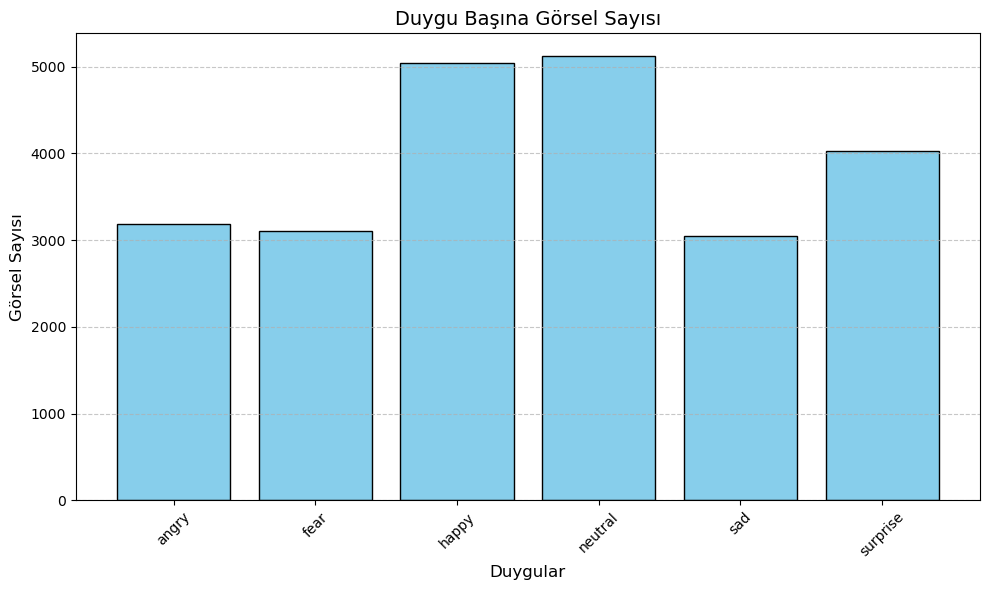

In [7]:
import matplotlib.pyplot as plt

# Daha önceki analizden dönen sözlüğü tekrar alalım
sinif_sayilari = sinif_dagilimini_yazdir("archive")

# Bar chart çizimi
duygular = list(sinif_sayilari.keys())
adetler = list(sinif_sayilari.values())

plt.figure(figsize=(10, 6))
plt.bar(duygular, adetler, color='skyblue', edgecolor='black')
plt.title("Duygu Başına Görsel Sayısı", fontsize=14)
plt.xlabel("Duygular", fontsize=12)
plt.ylabel("Görsel Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
import os
import random

def siniflari_ortalamaya_esitle(ana_klasor):
    sayilar = []

    # Her sınıfın örnek sayısını al
    for duygu in os.listdir(ana_klasor):
        klasor_yolu = os.path.join(ana_klasor, duygu)
        if os.path.isdir(klasor_yolu):
            gorseller = [f for f in os.listdir(klasor_yolu) if f.endswith(('.jpg', '.jpeg', '.png'))]
            sayilar.append(len(gorseller))

    ortalama = int(sum(sayilar) / len(sayilar))
    print(f"🎯 Ortalama hedef sayısı: {ortalama}")

    # Eşitleme işlemi
    for duygu in os.listdir(ana_klasor):
        klasor_yolu = os.path.join(ana_klasor, duygu)
        if not os.path.isdir(klasor_yolu):
            continue

        gorseller = [f for f in os.listdir(klasor_yolu) if f.endswith(('.jpg', '.jpeg', '.png'))]
        mevcut_sayi = len(gorseller)

        if mevcut_sayi > ortalama:
            silinecekler = random.sample(gorseller, mevcut_sayi - ortalama)
            for dosya in silinecekler:
                os.remove(os.path.join(klasor_yolu, dosya))
            print(f"🗑️ {duygu} sınıfından {len(silinecekler)} fazla görsel silindi.")
        elif mevcut_sayi < ortalama:
            print(f"⚠️ {duygu} sınıfı yetersiz (yalnızca {mevcut_sayi}). Veri artırımı yapılabilir.")
        else:
            print(f"👌 {duygu} sınıfı zaten dengeli.")

# Örnek kullanım:
siniflari_ortalamaya_esitle("archive")


🎯 Ortalama hedef sayısı: 3923
⚠️ angry sınıfı yetersiz (yalnızca 3190). Veri artırımı yapılabilir.
⚠️ fear sınıfı yetersiz (yalnızca 3103). Veri artırımı yapılabilir.
🗑️ happy sınıfından 1121 fazla görsel silindi.
🗑️ neutral sınıfından 1203 fazla görsel silindi.
⚠️ sad sınıfı yetersiz (yalnızca 3052). Veri artırımı yapılabilir.
🗑️ surprise sınıfından 103 fazla görsel silindi.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import shutil

def veri_klasorlerini_ayir(ana_klasor, hedef_klasor="data", test_orani=0.2):
    """
    archive klasöründeki verileri, 'data/train' ve 'data/test' klasörlerine ayırır.
    """
    if os.path.exists(hedef_klasor):
        shutil.rmtree(hedef_klasor)  # Öncekini sil
    os.makedirs(os.path.join(hedef_klasor, "train"), exist_ok=True)
    os.makedirs(os.path.join(hedef_klasor, "test"), exist_ok=True)

    for duygu in os.listdir(ana_klasor):
        klasor_yolu = os.path.join(ana_klasor, duygu)
        if not os.path.isdir(klasor_yolu):
            continue
        gorseller = [f for f in os.listdir(klasor_yolu) if f.endswith(('.jpg', '.jpeg', '.png'))]
        train, test = train_test_split(gorseller, test_size=test_orani, random_state=42)

        os.makedirs(os.path.join(hedef_klasor, "train", duygu), exist_ok=True)
        os.makedirs(os.path.join(hedef_klasor, "test", duygu), exist_ok=True)

        for g in train:
            shutil.copy(os.path.join(klasor_yolu, g), os.path.join(hedef_klasor, "train", duygu, g))
        for g in test:
            shutil.copy(os.path.join(klasor_yolu, g), os.path.join(hedef_klasor, "test", duygu, g))

    print("✅ Eğitim/test verileri ayrıldı ve klasörlendi.")

# Çalıştır:
veri_klasorlerini_ayir("archive", "data")


✅ Eğitim/test verileri ayrıldı ve klasörlendi.


In [28]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

# 📁 Eğitim verisi
train_dir = 'data/train'
img_height, img_width = 96, 96
batch_size = 64
num_classes = 6

datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Numpy dönüşümü (GridSearch için)
x_train, y_train = [], []
for i in range(len(train_data)):
    X, y = train_data[i]
    x_train.extend(X)
    y_train.extend(y)
    if len(x_train) >= train_data.samples:
        break
x_train = np.array(x_train)
y_train = np.array(y_train)

# 🧠 CNN modeli tanımı
def build_cnn_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Input(shape=(img_height, img_width, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 🎯 KerasClassifier
clf = KerasClassifier(model=build_cnn_model, epochs=5, batch_size=batch_size, verbose=1)

# 📊 Daha büyük parametre grid
param_grid = {
    'model__learning_rate': [0.001, 0.0005, 0.0001],
    'model__dropout_rate': [0.3, 0.5]
}

# 🔍 GridSearchCV
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, verbose=2)
grid_result = grid.fit(x_train, y_train)

# ✅ En iyi modeli kaydet
best_model = grid_result.best_estimator_.model_
best_model.save("best_model_cnn_gridsearch.h5")
print("✅ En iyi CNN modeli kaydedildi.")


Found 16889 images belonging to 6 classes.
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 119s 874ms/step - accuracy: 0.3686 - loss: 3.4085
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 141s 871ms/step - accuracy: 0.5581 - loss: 2.0366
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 138s 840ms/step - accuracy: 0.6320 - loss: 1.8049
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 114s 861ms/step - accuracy: 0.6578 - loss: 1.6204
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 112s 844ms/step - accuracy: 0.6867 - loss: 1.5192
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step
[CV] END model__dropout_rate=0.3, model__learning_rate=0.001; total time=11.1min
Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 108s 778ms/step - accuracy: 0.3769 - loss: 3.3483
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 145s 803ms/step - accuracy: 0.5476 - loss: 2.0376
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 105s 796ms/step - accuracy: 0.5995 - loss: 1.8326
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 141s 788ms/step - acc

✅ En iyi CNN modeli kaydedildi.


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# 📁 Eğitim verisi
train_dir = 'data/train'
img_height, img_width = 96, 96
batch_size = 64
num_classes = 6

# 🔁 ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Numpy dönüşümü
x_train, y_train = [], []
for i in range(len(train_data)):
    X, y = train_data[i]
    x_train.extend(X)
    y_train.extend(y)
    if len(x_train) >= train_data.samples:
        break
x_train = np.array(x_train)
y_train = np.array(y_train)

# 🧠 MobileNetV2 model fonksiyonu
def build_mobilenetv2_model(learning_rate=0.001, dropout_rate=0.5):
    base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Transfer learning - frozen
    
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 🎯 KerasClassifier sarmalayıcı
clf = KerasClassifier(model=build_mobilenetv2_model, epochs=5, batch_size=batch_size, verbose=1)

# 📊 Grid parametreleri (3x3 = 9 kombinasyon)
param_grid = {
    'model__learning_rate': [0.001, 0.0005, 0.0001],
    'model__dropout_rate': [0.3, 0.5]
}

# 🔍 GridSearch başlat
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, verbose=2)
grid_result = grid.fit(x_train, y_train)

# ✅ En iyi modeli kaydet
best_model = grid_result.best_estimator_.model_
best_model.save("best_model_mobilenetv2_gridsearch.h5")
print("✅ En iyi MobileNetV2 modeli kaydedildi.")


Found 16889 images belonging to 6 classes.
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 224ms/step - accuracy: 0.4002 - loss: 1.4619
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 31s 234ms/step - accuracy: 0.5355 - loss: 1.0549
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.5839 - loss: 0.9722
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.6138 - loss: 0.9168
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 38s 180ms/step - accuracy: 0.6529 - loss: 0.8387
132/132 ━━━━━━━━━━━━━━━━━━━━ 28s 203ms/step
[CV] END model__dropout_rate=0.3, model__learning_rate=0.001; total time= 3.7min
Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 28s 168ms/step - accuracy: 0.3768 - loss: 1.5331
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - accuracy: 0.5292 - loss: 1.0781
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - accuracy: 0.5839 - loss: 0.9955
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.

✅ En iyi MobileNetV2 modeli kaydedildi.


In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# 📁 Eğitim verisi
train_dir = 'data/train'
img_height, img_width = 96, 96
batch_size = 64
num_classes = 6

# 🔁 Eğitim verisini hazırla
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Numpy dönüşümü
x_train, y_train = [], []
for i in range(len(train_data)):
    X, y = train_data[i]
    x_train.extend(X)
    y_train.extend(y)
    if len(x_train) >= train_data.samples:
        break
x_train = np.array(x_train)
y_train = np.array(y_train)

# 🧠 ResNet50 model fonksiyonu
def build_resnet50_model(learning_rate=0.001, dropout_rate=0.5):
    base_model = ResNet50(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Transfer learning

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 🎯 KerasClassifier
clf = KerasClassifier(model=build_resnet50_model, epochs=5, batch_size=batch_size, verbose=1)

# 📊 Grid parametreleri
param_grid = {
    'model__learning_rate': [0.001, 0.0005, 0.0001],
    'model__dropout_rate': [0.3, 0.5]
}

# 🔍 GridSearch başlat
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, verbose=2)
grid_result = grid.fit(x_train, y_train)

# ✅ En iyi modeli kaydet
best_model = grid_result.best_estimator_.model_
best_model.save("best_model_resnet50_gridsearch.h5")
print("✅ En iyi ResNet50 modeli kaydedildi.")

#hocam bu kodda hata yok sadece yanlışlıkla tekrar eğitmeye basınca  böyle oldu bende zaman kalmayınca durdurmak zorunda kaldım.

Found 16889 images belonging to 6 classes.
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1875 - loss: 1.8304
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 138s 976ms/step - accuracy: 0.2515 - loss: 1.7260
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 126s 954ms/step - accuracy: 0.2671 - loss: 1.6887
Epoch 4/5
 67/132 ━━━━━━━━━━━━━━━━━━━━ 1:04 985ms/step - accuracy: 0.2950 - loss: 1.6455

KeyboardInterrupt: 

In [44]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def degerlendirme_raporu_ve_cm(model_path, model_name="Model", test_generator=None):
    # Modeli yükle
    model = load_model(model_path)

    # Tahmin yap
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_generator.classes
    label_names = list(test_generator.class_indices.keys())

    # 📋 Classification report
    report = classification_report(y_true, y_pred, target_names=label_names, digits=2)
    print(f"\n📋 Classification Report ({model_name}):\n{report}")

    # 🧩 Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_names, yticklabels=label_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


Found 4225 images belonging to 6 classes.


C:\Users\nrllh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step

📋 Classification Report (CNN):
              precision    recall  f1-score   support

       angry       0.63      0.57      0.60       638
        fear       0.45      0.49      0.47       621
       happy       0.90      0.87      0.88       785
     neutral       0.81      0.86      0.83       785
         sad       0.54      0.50      0.52       611
    surprise       0.53      0.56      0.54       785

    accuracy                           0.65      4225
   macro avg       0.64      0.64      0.64      4225
weighted avg       0.66      0.65      0.65      4225



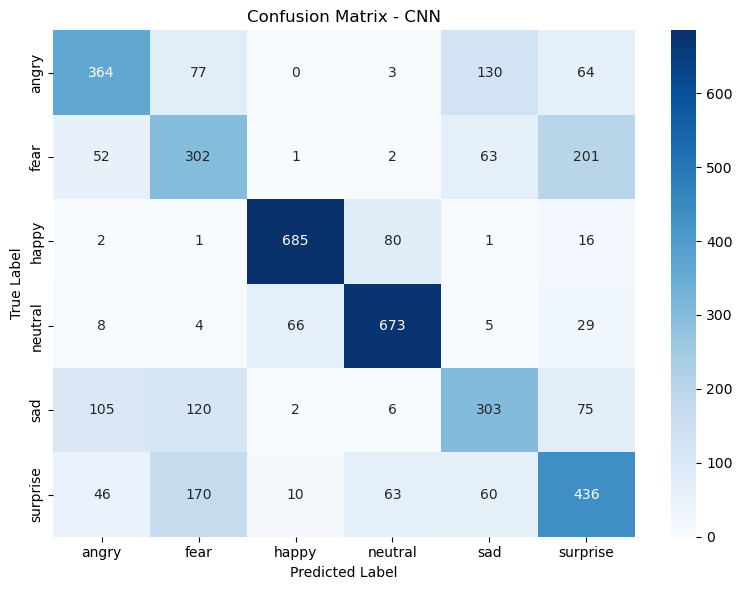

67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step

📋 Classification Report (MobileNetV2):
              precision    recall  f1-score   support

       angry       0.47      0.58      0.52       638
        fear       0.48      0.40      0.43       621
       happy       0.69      0.65      0.67       785
     neutral       0.62      0.70      0.66       785
         sad       0.43      0.37      0.40       611
    surprise       0.43      0.41      0.42       785

    accuracy                           0.53      4225
   macro avg       0.52      0.52      0.52      4225
weighted avg       0.53      0.53      0.53      4225



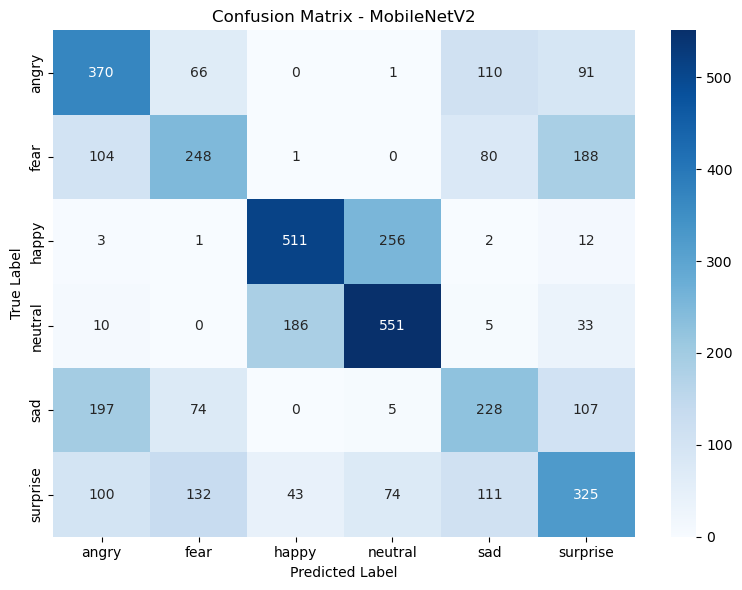

67/67 ━━━━━━━━━━━━━━━━━━━━ 54s 771ms/step

📋 Classification Report (ResNet50):
              precision    recall  f1-score   support

       angry       0.29      0.46      0.36       638
        fear       0.39      0.12      0.18       621
       happy       0.43      0.64      0.51       785
     neutral       0.45      0.08      0.13       785
         sad       0.33      0.00      0.00       611
    surprise       0.26      0.56      0.35       785

    accuracy                           0.32      4225
   macro avg       0.36      0.31      0.26      4225
weighted avg       0.36      0.32      0.27      4225



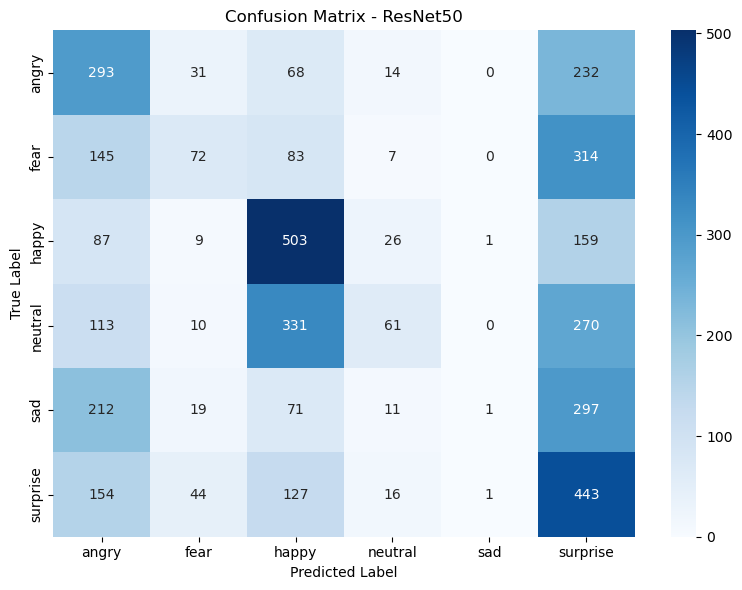

In [46]:
# Test verisi
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "data/test",
    target_size=(96, 96),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# 3 model için çalıştır
degerlendirme_raporu_ve_cm("best_model_cnn_gridsearch.h5", model_name="CNN", test_generator=test_generator)
degerlendirme_raporu_ve_cm("best_model_mobilenetv2_gridsearch.h5", model_name="MobileNetV2", test_generator=test_generator)
degerlendirme_raporu_ve_cm("best_model_resnet50_gridsearch.h5", model_name="ResNet50", test_generator=test_generator)


📊 Friedman Testi:
accuracy için p-değeri: 0.3679
precision için p-değeri: 0.3679
recall için p-değeri: 0.3679
f1 için p-değeri: 0.3679


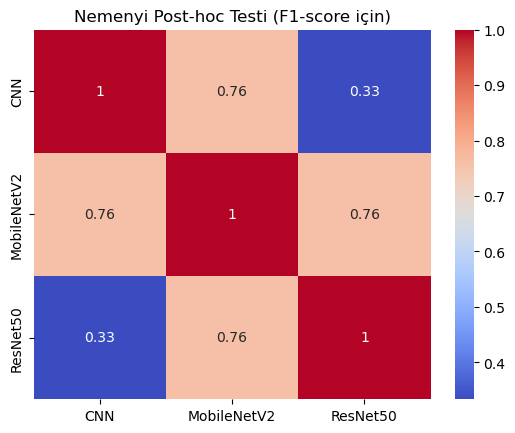

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import load_model
import numpy as np
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns

# Test verisi (shuffle=False olmalı)
test_generator.reset()
x_test, y_test = next(test_generator)
for i in range(1, len(test_generator)):
    x, y = next(test_generator)
    x_test = np.concatenate([x_test, x], axis=0)
    y_test = np.concatenate([y_test, y], axis=0)

# Gerçek etiketler
y_true = np.argmax(y_test, axis=1)

# Modellerin yolları ve isimleri
model_paths = {
    "CNN": "best_model_cnn_gridsearch.h5",
    "MobileNetV2": "best_model_mobilenetv2_gridsearch.h5",
    "ResNet50": "best_model_resnet50_gridsearch.h5"
}

# Metriği hesapla
def hesapla_metric(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1': f1_score(y_true, y_pred, average='macro')
    }

# Performans skorlarını topla
scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
tahminler = {}

for isim, yol in model_paths.items():
    model = load_model(yol)
    y_pred_probs = model.predict(x_test, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    tahminler[isim] = y_pred

    metrics = hesapla_metric(y_true, y_pred)
    for k, v in metrics.items():
        scores[k].append(v)

# 🎯 Friedman Testi
print("📊 Friedman Testi:")
for metric in scores:
    result = friedmanchisquare(*[ [s] for s in scores[metric] ])
    print(f"{metric} için p-değeri: {result.pvalue:.4f}")

# 🧪 Nemenyi Post-Hoc testi (sadece f1 örneği üzerinden)
data_for_posthoc = np.array([
    [scores['f1'][0], scores['f1'][1], scores['f1'][2]]
])
posthoc_result = sp.posthoc_nemenyi_friedman(data_for_posthoc)

sns.heatmap(posthoc_result, annot=True, cmap="coolwarm", xticklabels=model_paths.keys(), yticklabels=model_paths.keys())
plt.title("Nemenyi Post-hoc Testi (F1-score için)")
plt.show()


In [62]:
# Bu skorları daha önce hesapladıysan elle girilebilir ya da aşağıdaki gibi alınabilir.
f1_scores = {
    "CNN": scores['f1'][0],
    "MobileNetV2": scores['f1'][1],
    "ResNet50": scores['f1'][2]
}

# En iyi F1-score'a sahip modeli bul
final_model_name = max(f1_scores, key=f1_scores.get)
final_model_path = model_paths[final_model_name]

# Modeli yükle ve kaydet
final_model = load_model(final_model_path)
final_model.save("final_best_model.h5")
print(f"✅ Final model olarak '{final_model_name}' seçildi ve 'final_best_model.h5' olarak kaydedildi.")


✅ Final model olarak 'CNN' seçildi ve 'final_best_model.h5' olarak kaydedildi.
